IMPORT HEADERS

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_10579/2853212854.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


IMPORT DATASET

In [2]:
df = pd.read_csv('customer_churn.csv')

IMPORT HEADERS

In [3]:
#MODEL OUTPUT
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
#PREPROCESSIBG
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#FEATURE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SequentialFeatureSelector, f_classif
#MODELS
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

EDA

In [4]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
df.tail()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0
899,Joseph Williams,39.0,9315.60,1,5.02,10.0,2010-09-25 12:16:08,"27252 Olivia Burgs Rivasmouth, MN 80121-6348",Davis Group,0


In [6]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [8]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [9]:
df.shape

(900, 10)

In [10]:
df.dtypes

Names               object
Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object

In [11]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

LABEL ENCODING

In [12]:
le = LabelEncoder()
df['Names']= le.fit_transform(df['Names']) 
df['Location']= le.fit_transform(df['Location'])
df['Company']= le.fit_transform(df['Company'])
df['Onboard_date']= le.fit_transform(df['Onboard_date'])

df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,127,42.0,11066.80,0,7.22,8.0,634,81,325,1
1,519,41.0,11916.22,0,6.50,11.0,631,487,849,1
2,285,38.0,12884.75,0,6.67,12.0,871,114,499,1
3,698,42.0,8010.76,0,6.71,10.0,691,110,704,1
4,193,37.0,9191.58,0,5.56,9.0,838,607,458,1


In [13]:
df.dtypes

Names                int64
Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date         int64
Location             int64
Company              int64
Churn                int64
dtype: object

HEATMAP

<Axes: >

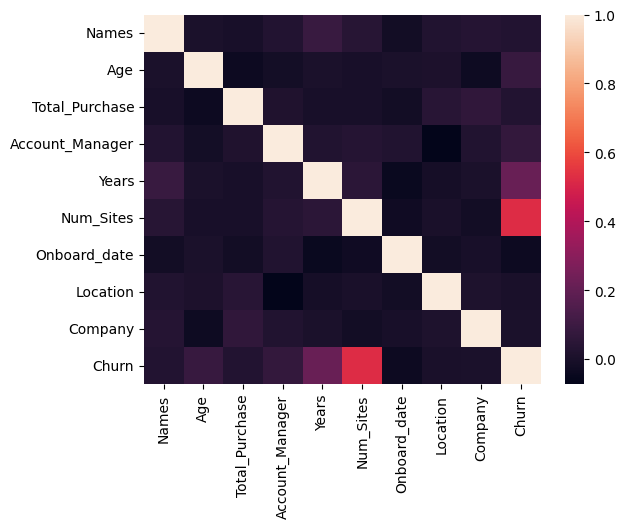

In [14]:
sns.heatmap(df.corr())

HISTOGRAMS 

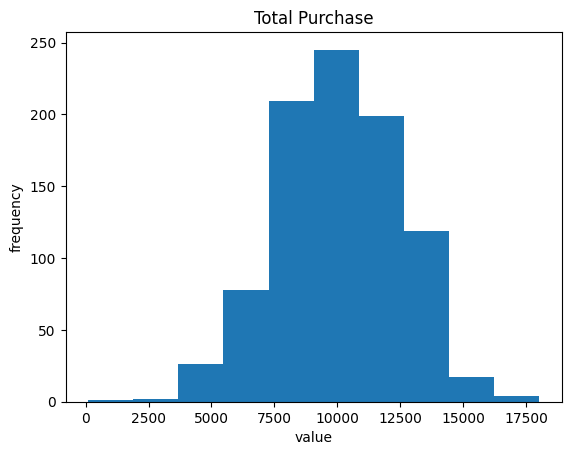

In [15]:
plt.hist(df['Total_Purchase'])
plt.title('Total Purchase')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

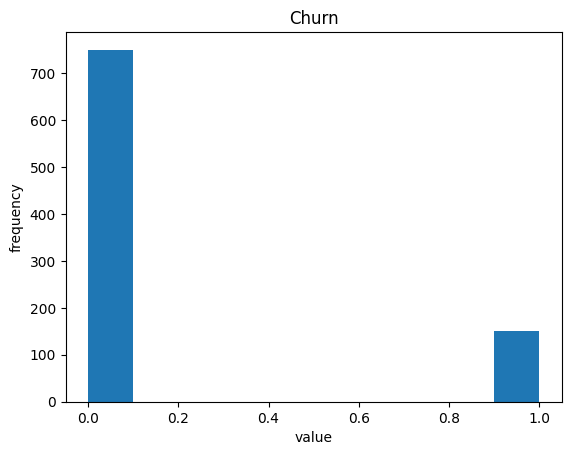

In [16]:
plt.hist(df['Churn'])
plt.title('Churn')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

SCATTER PLOT

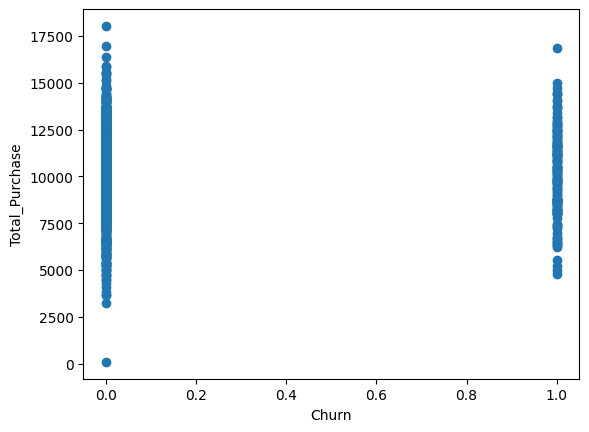

In [17]:
plt.scatter(df['Churn'],df['Total_Purchase'])
plt.xlabel('Churn')
plt.ylabel('Total_Purchase')
plt.show()

BAR CHART

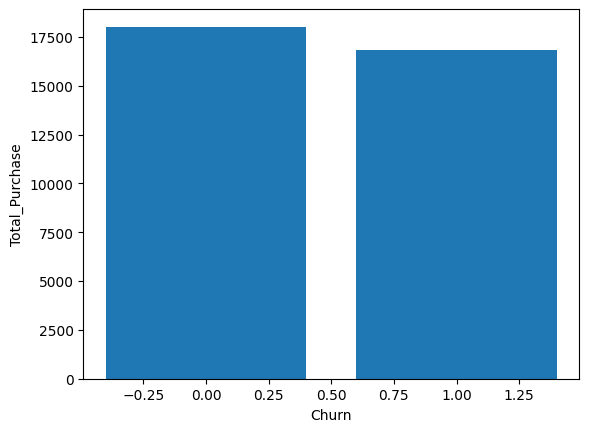

In [18]:
plt.bar(df['Churn'],df['Total_Purchase'])
plt.xlabel('Churn')
plt.ylabel('Total_Purchase')
plt.show()

STANDARDIZATION

In [19]:
scaler = MinMaxScaler()
df_standardised = scaler.fit_transform(df)
print(df_standardised)

[[0.14142539 0.46511628 0.61178143 ... 0.09010011 0.37270642 1.        ]
 [0.577951   0.44186047 0.65916621 ... 0.54171301 0.97362385 1.        ]
 [0.31737194 0.37209302 0.71319552 ... 0.12680756 0.57224771 1.        ]
 ...
 [0.04565702 0.53488372 0.66697386 ... 0.99555061 0.77981651 0.        ]
 [0.52672606 0.6744186  0.35802334 ... 0.44716352 0.74311927 0.        ]
 [0.50556793 0.39534884 0.51409098 ... 0.22914349 0.21674312 0.        ]]


NORMALIZATION

In [20]:
normal = Normalizer()
df_normalised = scaler.fit_transform(df)
print(df_normalised)

[[0.14142539 0.46511628 0.61178143 ... 0.09010011 0.37270642 1.        ]
 [0.577951   0.44186047 0.65916621 ... 0.54171301 0.97362385 1.        ]
 [0.31737194 0.37209302 0.71319552 ... 0.12680756 0.57224771 1.        ]
 ...
 [0.04565702 0.53488372 0.66697386 ... 0.99555061 0.77981651 0.        ]
 [0.52672606 0.6744186  0.35802334 ... 0.44716352 0.74311927 0.        ]
 [0.50556793 0.39534884 0.51409098 ... 0.22914349 0.21674312 0.        ]]


DEFINING x, y

In [21]:
x=df.drop(columns=["Churn"])
y=df["Churn"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

FEATURE

In [22]:
k_best = SelectKBest(score_func=chi2, k=2)
best=k_best.fit_transform(x,y)
print(best)

[[11066.8    634.  ]
 [11916.22   631.  ]
 [12884.75   871.  ]
 ...
 [12056.18   706.  ]
 [ 6517.93   541.  ]
 [ 9315.6    417.  ]]


In [23]:
classif = SelectKBest(score_func=f_classif, k=5)
fclass = classif.fit_transform(x, y)
print(classif)

SelectKBest(k=5)


DATA SPLITTING

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=42)

NAIVE BAYAS

In [25]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [26]:
y_pred_nb = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [27]:
perc = Perceptron()
perc.fit(x_train, y_train)

Perceptron()

In [28]:
y_pred_perc = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_perc))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_perc))
print(classification_report(y_test, y_pred_perc))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [29]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [30]:
y_pred_svc = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [31]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred_knn = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [33]:
kmeans = KMeans(n_clusters=3,random_state=52)
kmeans.fit(x_train, y_train)

KMeans(n_clusters=3, random_state=52)

In [34]:
y_pred_kmeans = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_kmeans))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_kmeans))
print(classification_report(y_test, y_pred_kmeans))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [35]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
y_pred_rf = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [37]:
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)

/home/haswin/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [38]:
y_pred_ab = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_ab))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [39]:
bag = BaggingClassifier()
bag.fit(x_train, y_train)

BaggingClassifier()

In [40]:
y_pred_bag = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_bag))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



In [41]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred_tree = nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy :  0.9
Confusion Matrix :  [[218   9]
 [ 18  25]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       227
           1       0.74      0.58      0.65        43

    accuracy                           0.90       270
   macro avg       0.83      0.77      0.80       270
weighted avg       0.89      0.90      0.90       270



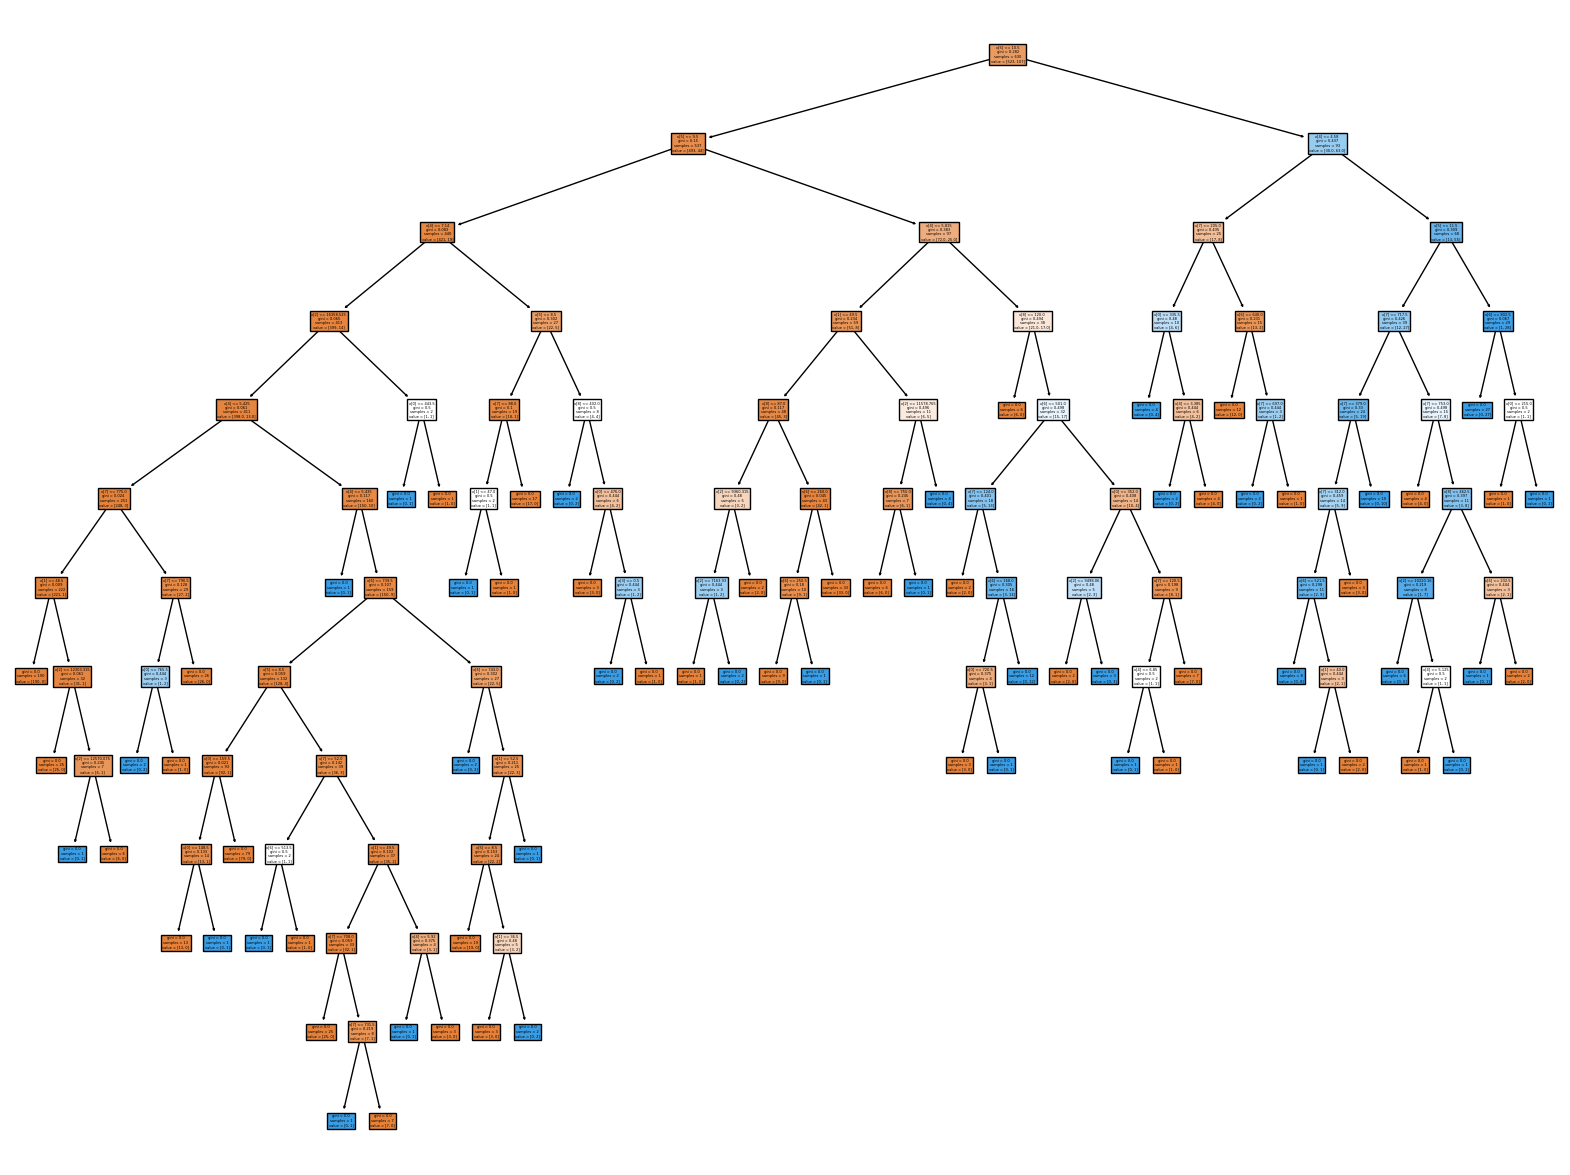

In [43]:
fig = plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True)
plt.show()

ROC CURVE

In [44]:
from sklearn.metrics import roc_curve

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_pred_ab)
fpr_kmeans, tpr_kmeans, thresholds_kmeans = roc_curve(y_test, y_pred_kmeans)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_perc, tpr_perc, thresholds_perc = roc_curve(y_test, y_pred_perc)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc)


AUC SCORE

In [47]:
auc_score = roc_auc_score(y_test, y_pred_nb)
print("Naivebayes:", auc_score)

auc_score = roc_auc_score(y_test, y_pred_ab)
print("adaboost:", auc_score)

auc_score = roc_auc_score(y_test, y_pred_kmeans)
print("kmeans:", auc_score)

auc_score = roc_auc_score(y_test, y_pred_knn)
print("KNN:", auc_score)

auc_score = roc_auc_score(y_test, y_pred_perc)
print("perceptron:", auc_score)

auc_score = roc_auc_score(y_test, y_pred_rf)
print("Random forest:", auc_score)

auc_score = roc_auc_score(y_test, y_pred_svc)
print("SVC:", auc_score)

Naivebayes: 0.7708738858723492
adaboost: 0.7708738858723492
kmeans: 0.7708738858723492
KNN: 0.7708738858723492
perceptron: 0.7708738858723492
Random forest: 0.7708738858723492
SVC: 0.7708738858723492


In [ ]:
ROC CURVE DISPLAY

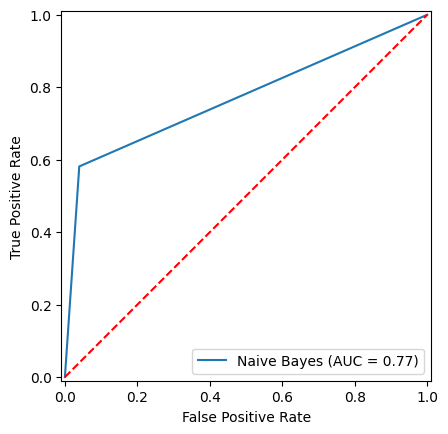

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()


DIMENSIONALITY REDUCTION : PCA

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data = pca.fit_transform(df)
data

array([[-1001.31886393,  -527.60307868,    33.35336561,  -109.93641333,
           20.05182153],
       [-1855.8251833 ,    73.47606422,  -319.33934484,    35.64857459,
          298.50362608],
       [-2819.95950346,  -493.93263077,  -285.71917681,   -40.29252668,
           66.92229394],
       ...,
       [-1996.48436917,   -79.46706164,    28.24990384,   560.86419726,
          392.73723187],
       [ 3543.79082422,    16.56694225,  -166.90336355,   -25.93067726,
          183.31649428],
       [  749.87220367,  -177.94327825,    76.30237487,  -178.20916921,
         -223.66976976]])